# Arg Antenna exploration and processing
La idea es

* Catalogar antenas por sus provincias 
* Graficar el mapa de Arg con sus antennas
* Graficar el mapa de GC
* limpiar aquellas que caigan "al agua"
* Catalogar las antenas como pertenecientes o no a regiones del *"Gran Chaco"* arg
* dibujar la zona epidemica

# Comparar con el file surrogado


## definicion utilizada
CEL_ID es el hash de la antenna, cel_description es el "barrio de la antenna" y lat, long as usual

### input head

In [1]:
!head data/celdas.csv

CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD
CO534D,CHATEAU - VILLA AGUR,-31.3703,-64.2403
CO534F,CHATEAU - VILLA AGUR,-31.3703,-64.2403
CO534X,CHATEAU - VILLA AGUR,-31.3703,-64.2403
CO535A,BARRIO EL ROSEDAL,-31.4353,-64.2248
CO535B,BARRIO EL ROSEDAL,-31.4353,-64.2248
CO535C,BARRIO EL ROSEDAL,-31.4353,-64.2248
CO535D,BARRIO EL ROSEDAL,-31.4353,-64.2248
CO535E,BARRIO EL ROSEDAL,-31.4353,-64.2248
CO535X,BARRIO EL ROSEDAL,-31.4353,-64.2248


In [2]:
import numpy as np; 
import pandas as pd; 
import unicodedata;
import matplotlib;
import os
import random
pd.set_option('display.max_rows', 500)
%matplotlib inline
import unicodedata
import geopandas as gpd;
from geopandas.geoseries import *
import shapely


In [3]:
rootdir=os.getcwd()
rootdir = os.path.expanduser('/home/teo/Repositories/Tesis/')

In [4]:
global mapa

In [5]:
dropped_file = "data/celdas_dropped.csv"
dropped_antennas = pd.read_csv(dropped_file,header=None)
dropped_antennas = dropped_antennas.values.flatten()

In [6]:
antennas_file = 'data/celdas.csv'
antennas_file_out = 'data/celdas_limpio.csv'
raw_antennas =  pd.read_csv(antennas_file, 
                            #engine = 'python',
                            error_bad_lines=False, 
                           warn_bad_lines=True)

Skipping line 5040: expected 4 fields, saw 9
Skipping line 5041: expected 4 fields, saw 9
Skipping line 5042: expected 4 fields, saw 9
Skipping line 5401: expected 4 fields, saw 9
Skipping line 5402: expected 4 fields, saw 9
Skipping line 5403: expected 4 fields, saw 9
Skipping line 11626: expected 4 fields, saw 5
Skipping line 11627: expected 4 fields, saw 5
Skipping line 11628: expected 4 fields, saw 5
Skipping line 11629: expected 4 fields, saw 5
Skipping line 11630: expected 4 fields, saw 5
Skipping line 11631: expected 4 fields, saw 5
Skipping line 11632: expected 4 fields, saw 5
Skipping line 25496: expected 4 fields, saw 9
Skipping line 25819: expected 4 fields, saw 5
Skipping line 25820: expected 4 fields, saw 5
Skipping line 45046: expected 4 fields, saw 7
Skipping line 45047: expected 4 fields, saw 7
Skipping line 45048: expected 4 fields, saw 7
Skipping line 45049: expected 4 fields, saw 7
Skipping line 45050: expected 4 fields, saw 7
Skipping line 45051: expected 4 fields, 

# miramos a mano 
las filas rotas y guardamos el output para mirarlas a mano

In [7]:
idle_lines = [25496,25819,25820,57409]
error_lines = idle_lines + range(5040,5043) + range(5401,5404) + range(11626,11633) + range(11626,11633) +\
                range(45046,45053) + range(51932,51939) + range(54418,54425)  + range(57857,57862) 

lines = []
for num in error_lines:
    out = !tail -n+$num $antennas_file | head -n1
    lines += [out[0]]

In [8]:
#nos quedamos con la lista unica
lines_set = set(lines)
lines_set

{"BA784G,CHASCOM\xc3\x9aS 3,'-35,566,667.0000','-579,935.0000'",
 "BA784H,CHASCOM\xc3\x9aS 3,'-35,566,667.0000','-579,935.0000'",
 "BA784I,CHASCOM\xc3\x9aS 3,'-35,566,667.0000','-579,935.0000'",
 "BA784J,CHASCOM\xc3\x9aS 3,'-35,566,667.0000','-579,935.0000'",
 "BA784K,CHASCOM\xc3\x9aS 3,'-35,566,667.0000','-579,935.0000'",
 "BA784L,CHASCOM\xc3\x9aS 3,'-35,566,667.0000','-579,935.0000'",
 "BA784Z,CHASCOM\xc3\x9aS 3,'-35,566,667.0000','-579,935.0000'",
 "CF378G,GALERIAS PACIFICO,'-34,599,091.0000','-58,375,082.0000'",
 "CF378H,GALERIAS PACIFICO,'-34,599,091.0000','-58,375,082.0000'",
 "CF378I,GALERIAS PACIFICO,'-34,599,091.0000','-58,375,082.0000'",
 "CF378J,GALERIAS PACIFICO,'-34,599,091.0000','-58,375,082.0000'",
 "CF378K,GALERIAS PACIFICO,'-34,599,091.0000','-58,375,082.0000'",
 "CF378L,GALERIAS PACIFICO,'-34,599,091.0000','-58,375,082.0000'",
 "CF378Z,GALERIAS PACIFICO,'-34,599,091.0000','-58,375,082.0000'",
 "ME194A,SAN RAFAEL 13,'-34,609,869.0000','-68,311,548.0000'",
 "ME194B,SAN 

In [9]:
#agregamos estas antennas a mano
#pd.concat()

df = [['SE062C','TAPSO, LAVALLE',-27.777,-65.0980],
     ['SC029X','Avda Rivadavia y Med',-34.112,-58.4207],
     ['NQ047X','CERRO BANDERA, PIONE',-38.9587,-69.5138],
     ['ME194C','SAN RAFAEL 13',-38.609,-68.311],
     ['CF378L','GALERIAS PACIFICO',-34.599,-58.375],
     ['BA784L','CHASCOMUS 3',-35.566,-57.993]]
df = pd.DataFrame(df)
df.columns = raw_antennas.columns

raw_antennas = pd.concat([raw_antennas,df],axis=0,ignore_index=True)

In [10]:
# se colo una fila que es una repeticion del header
raw_antennas[raw_antennas['CEL_ID'].str.contains('CEL_I')].index

raw_antennas.ix[64965]

CEL_ID                      CEL_ID
CEL_DESCRIPTION    CEL_DESCRIPTION
LATITUD                    LATITUD
LONGITUD                  LONGITUD
Name: 64965, dtype: object

In [11]:
raw_antennas.drop(64965,axis=0,inplace=True)

## este es el file de la surrogacion de hash de antennas a numeric que usaba caro


In [12]:
## este es el file de la surrogacion de hash de antennas a numeric que usaba caro
antenna_hash_map_file = 'data/surrogated_antennas.txt'
!head $antenna_hash_map_file
!wc -l $antenna_hash_map_file

AA001 3416
B1061 4371
BA001 3020
BA003 1665
BA004 1078
BA006 2679
BA007 778
BA010 3255
BA013 3413
BA015 3169
4520 data/surrogated_antennas.txt


In [13]:
antenna_hash_map =  pd.read_csv(antenna_hash_map_file, sep = " " ,
                            #engine = 'python',
                            header=None, index_col = None )
antenna_hash_map.columns = ['CEL_ID', 'SURR_ID']

In [14]:
antenna_hash_map.shape, raw_antennas.shape

((4520, 2), (69834, 4))

## NULL check - Raw file
resulta que esta lleno de antennas que no tienen lat/long pues son las antennas que vienen de "afuera" i.e. los usuarios de la TelCo realizan un llamado del exterior y el sistema sabe que es su usuario, pero al estar en otro pais, se loggea como la antenna de la compania donde se realizo el llamado, luego no tienen lat/long y son llamados hechos en el exterior veraderamente

Ojo tmb hay antennas locales dropeadas y algunas tipo antennas de 'testeo' o especiales por algun evento masivo

In [15]:
#pasamos columnas lat long a float
ind = pd.to_numeric(raw_antennas['LATITUD'],errors='ignore').isnull()
ind2 = pd.to_numeric(raw_antennas['LONGITUD'],errors='ignore').isnull()
ind3 = raw_antennas['CEL_DESCRIPTION'].isnull()
# raw_antennas[['LONGITUD','LATITUD']].isnull().all(axis=1)
ind4 = ~ind & ind2

In [16]:
test = raw_antennas[ind]
test2 = raw_antennas[ind2]
test3 = raw_antennas[ind3]
test4 = raw_antennas[ind4]

In [17]:
test.sample(40)

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD
33556,TETORF,TEST TORCUATO 2,NaN,NaN
59722,RG026,BTL BELICE,NaN,NaN
38606,RG480,Tele Talk,NaN,NaN
11751,RG385,TELE-RING,NaN,NaN
31541,PPR4T,PREPAGO RIO CUARTO,NaN,NaN
26836,TEGYNX,TEST GUAYMALLEN,NaN,NaN
10518,TEBSCA,TEST BSCTLAUQ,NaN,NaN
62249,CO438,BIALET MASSE,NaN,NaN
62750,RG271,C&W Dominica,NaN,NaN
32002,RG079,CELL COM MALASIA,NaN,NaN


In [18]:
test2.sample(40)

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD
30976,BELCH,BELLSOUTH,NaN,NaN
13008,RG336,ASIACELL,NaN,NaN
45250,TEBBLA,TEST BAHIA BLANCA,NaN,NaN
60314,COW3,COW VILLA GESELL,NaN,NaN
11773,TEBHBE,TEST BSC B BLANCA,NaN,NaN
11299,COW35E,COW MOGOTES,NaN,NaN
30966,BA149,ESPARTILLAR,NaN,NaN
31609,COW15,FERIAGRO 2003.JUNIN,NaN,NaN
62778,CF359,LA PLATA 11,NaN,NaN
31500,PR005,PRUEBA MAR DEL PLATA,NaN,NaN


In [19]:
test3.shape, test4.shape

((3, 4), (7, 4))

In [20]:
test3

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD
31604,',NaN,NaN,NaN
31616,',NaN,NaN,NaN
55514,COW11,NaN,NaN,NaN


In [21]:
test4

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD
17191,',-31.6477,-60.7070,NaN
17193,',-31.6477,-60.7070,NaN
17195,',-31.6477,-60.7070,NaN
17197,',-31.6477,-60.7070,NaN
17199,',-31.6477,-60.7070,NaN
17201,',-31.6477,-60.7070,NaN
26412,',-31.6477,-60.7070,NaN


In [22]:
print(test['LATITUD'].isnull().sum(),test.shape[0])
print(test2['LONGITUD'].isnull().sum(),test2.shape[0])

(1574, 1574)
(1581, 1581)


In [23]:
#dropeamos filas con null en lat o long y guardamos las antennas droppeadas
dropped_antennas  = list(set(test.CEL_ID.values) | set(test2.CEL_ID.values))
len(dropped_antennas)

1573

In [35]:
np.random.choice(dropped_antennas,size = 50, replace = False)

array(['TF999', 'ERTST', 'C9999A', 'BELCH', 'COW51C', 'CT516', 'TEGYND',
       'RG245', 'TEJJYC', 'RG395', 'CO453', 'CTNN1C', 'RG043', 'RG025',
       'RG081', 'TMIG', 'TCEN', 'RG195', 'RG096', 'COW5E', 'RG433',
       'RG368', 'SC007', 'RN009', 'BA671C', 'CF667', 'RG402', 'BA184',
       'CF999A', 'COW18', 'CH009', 'RG502', 'BA998X', 'NQ998C', 'CR039',
       'BA998F', 'JU041', 'RG430', 'RG027', 'RG488', 'RG506', 'CO465',
       'CO900', 'PPCTM', 'RN023', 'CF862', 'CTNN2B', 'RG461', 'SE092',
       'RG049'], 
      dtype='|S6')

In [36]:
ant = 'CO998C'
raw_antennas[raw_antennas['CEL_ID'] == ant]

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD


In [26]:
#para ver cuantas voy a dropear
a = raw_antennas[raw_antennas.isnull().any(axis=1)]
len(a.CEL_ID.unique())

1573

In [27]:
print(raw_antennas.shape)
raw_antennas.dropna(inplace=True)
print(raw_antennas.shape)

(69834, 4)
(68253, 4)


## Falta droppear las antennas que tienen lat == long

In [28]:
print(raw_antennas[raw_antennas['LATITUD']==raw_antennas['LONGITUD']].shape)
raw_antennas[raw_antennas['LATITUD']==raw_antennas['LONGITUD']].sample(50)

(640, 4)


,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD
43386,C2098K,JAUREGUI 2,-34.5850,-34.5850
55204,COX05,LA FALDA POI,0.0000,0.0000
43833,C2250L,EL LAUQUEN,-34.9272,-34.9272
43861,C2270E,ESTACION VILLEG,-34.7033,-34.7033
44281,C2311L,CARREFOUR MOREN,-34.6337,-34.6337
39175,ME270,HOTEL HYATT MZA,0.0000,0.0000
44344,JU035K,CAIMANCITO REPE,-23.7383,-23.7383
32038,CT208,CATAMARCA 8,0.0000,0.0000
55176,ST108,CABRA CORRAL,0.0000,0.0000
25708,CF959,PERON Y RECONQUISTA,0.0000,0.0000


In [45]:
to_drop = raw_antennas[raw_antennas['LATITUD']==raw_antennas['LONGITUD']]
to_drop  = to_drop['CEL_ID'].sample(20).values
"will drop %s raw ants" % len(to_drop), to_drop

('will drop 20 raw ants',
 array(['SE083', 'SF432H', 'C2289J', 'JU048H', 'C1545H', 'CO581', 'T0990E',
        'RJ045', 'CO640L', 'CO319J', 'ME266', 'RJ057J', 'RN104H', 'SE095',
        'ME273', 'C2311E', 'ST110', 'CO622', 'MI210D', 'C2173K'], dtype=object))

In [47]:
to_drop

array(['SE083', 'SF432H', 'C2289J', 'JU048H', 'C1545H', 'CO581', 'T0990E',
       'RJ045', 'CO640L', 'CO319J', 'ME266', 'RJ057J', 'RN104H', 'SE095',
       'ME273', 'C2311E', 'ST110', 'CO622', 'MI210D', 'C2173K'], dtype=object)

In [48]:
raw_antennas = raw_antennas[~(raw_antennas['LATITUD']==raw_antennas['LONGITUD'])]
to_drop = list(set(raw_antennas[raw_antennas['LATITUD']==raw_antennas['LONGITUD']]['CEL_ID'].values))
dropped_antennas += to_drop
dropped_antennas = list(set(dropped_antennas))

In [49]:
np.random.choice(dropped_antennas,size = 50, replace = False)

array(['ST216B', 'TEGNQX', 'CF491', 'C9690Z', 'MI048', 'TU999', 'RG096',
       'RG330', 'RG087', 'GLOB', 'FO005', 'RG077', 'BA446', 'PPGYA',
       'TEGYNX', 'RG067', 'BA460', 'ME081', 'TIMSU', 'RG361', 'RG410',
       'PPPSD', 'CF978', 'RJ210', 'RG241', 'SL026', 'CO998D', 'RG181',
       'CF922', 'PPZPL', 'SC046E', 'RG074', 'RG210', 'MI002', 'RG132',
       'CF995A', 'RG415', 'PPGLP', 'RG448', 'PPVDM', 'CO991', 'TECR2C',
       'SFTSTX', 'TECDBE', 'RG278', 'RG376', 'RG497', 'PPCCD', 'BA169',
       'RG362'], 
      dtype='|S6')

## Delete last char???
from raw_antennas CEL_ID hash since those are in fact equal antennas 

In [52]:
# como caro hablo de filtrar el ultimo caracter del hash_name, sospecho que NO todas las antennas tienen este problema
# y que hay algunas "ya" filtradas del ultimo dataset, i.e. tienen char_length == 5

test = antenna_hash_map['CEL_ID'].apply(lambda x: len(x))

test2 = raw_antennas.copy()
test2['name'] = test2['CEL_ID'].apply(lambda x: x[:-1] if len(x) == 6 else x)
#me quedo con aquellas de len --> 5
test2 = test2[(test2['name'].apply(lambda x: len(x) == 5)).values]
test2 = test2.groupby('name' ).first()
test2['len'] = test2.CEL_ID.map(lambda x: len(x))

test.value_counts(), test2['len'].value_counts()

(5    4520
 Name: CEL_ID, dtype: int64, 6    5384
 5     429
 Name: len, dtype: int64)

In [53]:
antenna_hash_map.head()

,CEL_ID,SURR_ID
0,AA001,3416
1,B1061,4371
2,BA001,3020
3,BA003,1665
4,BA004,1078


In [54]:
test2.head()

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD,len
name,,,,,
AA001,AA001A,ANTARTIDA ARGENTINA,-64.2544,-56.6488,6
B1061,B1061A,MUNDO MARNO,-36.3390,-56.7468,6
B1062,B1062A,BUNGE RAMALLO,-33.4578,-60.0522,6
BA001,BA001,GOBERNADOR UGARTE,-35.1641,-60.0866,5
BA003,BA003G,25 DE MAYO,-35.4275,-60.1538,6


In [55]:
# algunos chequeos de rigor a ve cuanto se intersecan y cuanto es la union de las 2
len(set(test2.index.values) | set(antenna_hash_map['CEL_ID'])) , len(set(test2.index.values) & set(antenna_hash_map['CEL_ID']))

(5820, 4513)

In [56]:
len(set(test2.index.values)) , len(set(antenna_hash_map['CEL_ID']))

(5813, 4520)

# Problema
Diferencia en el count de c/ datset, entre el raw y el de caro

In [57]:
to_drop = raw_antennas[raw_antennas['CEL_ID'].apply(lambda x : len(x)<5)]['CEL_ID'].values
to_drop  = list(set(to_drop))
print('Dropping %s badly hashed ants' %len(to_drop))

raw_antennas = raw_antennas[~raw_antennas['CEL_ID'].isin(to_drop)]

dropped_antennas += (to_drop)

Dropping 2 badly hashed ants


In [58]:
to_drop

['CF25', 'MROS']

# IMPORTANTE
Los resultados de esta parte son muy importantes para determinar que como agrupar las antennas y para determinar posibles errores futuros en el procesamiento. Pues la *hipotesis* es que el hash de las antenas esta extendido en un caracter por lo cual la base es esencialmente una base con multiples duplicaiciones de antenas (una por c/ caracter excedente) 

In [59]:
raw_antennas['CEL_ID1'] = raw_antennas['CEL_ID'].apply(lambda x: x[:-1] if len(x) == 6 else x)

grouped = raw_antennas.groupby('CEL_ID1')

In [60]:
#a random ant is stripped from its last char and tested to see if its lat/long always matches
total_analyzed = 200
bad_antenna_list = []
for i in range(total_analyzed):
    ant = raw_antennas.sample(1)['CEL_ID'].values[0]
    if len(ant) == 6:
        ant2 = ant[:-1]
    group1 = grouped.get_group(ant2)
    res = ((group1['LATITUD'] == group1.iloc[0]['LATITUD']) & (group1['LONGITUD'] == group1.iloc[0]['LONGITUD'])).all()
    if not(res):
        bad_antenna_list+= [ant,ant2]

bad_antennas=len(bad_antenna_list)*0.5        
print('Of {1} antennas {0} were "bad", ratio is {2} \n A sample of 10 bad hashes is shown:'.format(bad_antennas,total_analyzed,
                                                            bad_antennas/total_analyzed))
bad_antenna_list[0:20]

Of 200 antennas 66.0 were "bad", ratio is 0.33 
 A sample of 10 bad hashes is shown:


['SF275A',
 'SF275',
 'RJ001K',
 'RJ001',
 'ME231H',
 'ME231',
 'CR017I',
 'CR017',
 'C1145Z',
 'C1145',
 'CF318X',
 'CF318',
 'C1454B',
 'C1454',
 'BA643L',
 'BA643',
 'C1473Z',
 'C1473',
 'ST124C',
 'ST124']

In [61]:
#TEST IF lat/longs along stripped antenna hashes are consistent in a random group i.e. all equal to the first row
(group1['LATITUD'] == group1.iloc[0]['LATITUD']) & (group1['LONGITUD'] == group1.iloc[0]['LONGITUD'])

49252    True
49253    True
49254    True
49255    True
49256    True
49257    True
49258    True
53982    True
53983    True
53984    True
53985    True
53986    True
53987    True
53988    True
dtype: bool

In [62]:
print(ant)
raw_antennas[raw_antennas['CEL_ID'].str.contains(ant)]

SL104H


,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD,CEL_ID1
53983,SL104H,AERÓDROMO VILLA MERC,-33.6522,-65.4304,SL104


## We proceed
with antenna hash last char stripping anyways

In [63]:
raw_antennas.drop('CEL_ID',axis = 1, inplace = True)
raw_antennas.rename(columns={'CEL_ID1':'CEL_ID'},inplace=True)

In [64]:
raw_antennas.head()

,CEL_DESCRIPTION,LATITUD,LONGITUD,CEL_ID
0,CHATEAU - VILLA AGUR,-31.3703,-64.2403,CO534
1,CHATEAU - VILLA AGUR,-31.3703,-64.2403,CO534
2,CHATEAU - VILLA AGUR,-31.3703,-64.2403,CO534
3,BARRIO EL ROSEDAL,-31.4353,-64.2248,CO535
4,BARRIO EL ROSEDAL,-31.4353,-64.2248,CO535


In [65]:
# since all rows are "almost" equal per CEL_ID group, we aggregate that info per antenna
print(raw_antennas.shape)
raw_antennas = raw_antennas.groupby('CEL_ID').first()
print(raw_antennas.shape)

(67611, 4)
(5813, 3)


### testeamos el join de las antennas en hash con las surrogadas por caro
para ver cuantas antennas se quedan afuera, o no tenemos mas

In [66]:
# testeamos el join de las antennas en hash con las surrogadas
test = pd.merge(raw_antennas.reset_index(level=0),antenna_hash_map,on = 'CEL_ID', how='outer')

test.shape

(5820, 5)

In [67]:
test[test['CEL_ID'].isnull()]

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD,SURR_ID


In [68]:
test[test['SURR_ID'].isnull()].shape

(1300, 5)

In [71]:
test[test['SURR_ID'].isnull()].sample(50)

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD,SURR_ID
1353,C1762,V BERNAL OE 1,-34.7261,-58.3252,NaN
2194,CF101,LOS PINOS,-34.6648,-58.5903,NaN
1728,C2221,ALSINA Y VIRREY CEBA,-34.6113,-58.3889,NaN
5587,ST140,PAYOGASTA,-25.0500,-66.1000,NaN
5613,ST166,LESSER,-24.6970,-65.4799,NaN
4994,SF212,MARIA JUANA,-31.6727,-61.7625,NaN
3118,CO231,V.MARIA DE RIO SECO,-29.9097,-63.7219,NaN
1370,C1780,AV UNIDAD NAC 2,-34.4905,-58.5135,NaN
495,BA759,ESCONDIDO B°,-37.3760,-59.0935,NaN
4974,SF135,ROMANG NUEVO,-29.4988,-59.7513,NaN


## PROBLEMA
Muchas antennas sin surr_id, i.e. se quedan afuera de la db

In [73]:
# finalmente limpiamos la columan cel_description con algo mas manejable computacionalmente
#funcion que le saca las tildes, los puntos y cambia espacios por '_'
def preparar_nombre(s):
    #decodificamos el string con utf8 a unicode
    try:
        s =  s.decode('utf8')
    except:
        print(s)
    #esta linea elimina las tildes
    sin_tilde = ''.join((c for c in unicodedata.normalize('NFKD', s) if unicodedata.category(c) != 'Mn')) 
    sin_punto = sin_tilde.replace(".", "")
    limpio = sin_punto.replace(" ", "_")
    return limpio

In [74]:
raw_antennas['CEL_DESCRIPTION'] = raw_antennas['CEL_DESCRIPTION'].apply(lambda x: preparar_nombre(x))

In [75]:
#pasamos los strings de lat/long a float
raw_antennas['LATITUD'] = pd.to_numeric(raw_antennas['LATITUD'])
raw_antennas['LONGITUD'] = pd.to_numeric(raw_antennas['LONGITUD'])


## LOAD MAP department files

In [76]:
departamentos = gpd.GeoDataFrame.from_file(rootdir+'data/ARG_adm2.shp')
#saco las variables que no voy a utilizar
departamentos.drop(['ENGTYPE_2','ISO','ID_0','ID_2','NAME_0','VARNAME_2'],axis=1,inplace=True)
departamentos.drop(['ID_1','TYPE_2','NL_NAME_2'],axis=1,inplace=True)
departamentos.rename(columns={'NAME_1': 'PROVINCIA','NAME_2':'DEPARTAMENTO'}, inplace=True)

In [77]:
# delete accents and replace special characters with ASCII
def preparar_depto(s):
    #esta linea elimina las tildes
    sin_tilde = ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')) 
    sin_punto = sin_tilde.replace(".", "")
    limpio = sin_punto.replace(" ", "_")
    return limpio

In [78]:
departamentos['PROVINCIA']=departamentos['PROVINCIA'].apply(preparar_depto)
departamentos['DEPARTAMENTO']=departamentos['DEPARTAMENTO'].apply(preparar_depto)
departamentos['FILENAME']=departamentos.apply(lambda x: x['PROVINCIA'] + '-'+ x['DEPARTAMENTO'], axis =1)
departamentos = departamentos[['PROVINCIA','DEPARTAMENTO','FILENAME','geometry']]


In [79]:
departamentos.head()

,PROVINCIA,DEPARTAMENTO,FILENAME,geometry
0,Buenos_Aires,Adolfo_Alsina,Buenos_Aires-Adolfo_Alsina,POLYGON ((-63.28128433227539 -36.6123085021972...
1,Buenos_Aires,Adolfo_Gonzales_Chaves,Buenos_Aires-Adolfo_Gonzales_Chaves,POLYGON ((-60.45724487304688 -37.6021881103515...
2,Buenos_Aires,Alberti,Buenos_Aires-Alberti,POLYGON ((-60.24544143676758 -34.8256492614746...
3,Buenos_Aires,Almirante_Brown,Buenos_Aires-Almirante_Brown,POLYGON ((-58.33725738525385 -34.7585868835449...
4,Buenos_Aires,Ameghino,Buenos_Aires-Ameghino,"POLYGON ((-62.0881614685058 -34.9758415222168,..."


In [80]:
#esta funcion es para mantener la consistencia de los nombres de los departamentos a lo largo de todos
#los datasets que hay, para cualquier tipo de dato.
def preparar_nombre_departamental(s):
    #esta linea elimina las tildes
    s = s.replace("Entre_Rios","Entre_rios").replace("La_Rioja","La_rioja").replace("San_Juan","San_juan")
    s=s.replace("Rio_Negro","Rio_negro").replace("San_Luis","San_luis").replace("Santa_Fe","Santa_fe")
    s=s.replace("Santa_Cruz","Santa_cruz").replace("Santiago_del_Estero","Santiago_del_estero")
    s=s.replace("La_Pampa","La_pampa").replace("Tierra_del_Fuego","Tierra_del_fuego").replace("rio_negro","Rio_negro")
    s = s.replace(".", "").replace(" ", "_")
    return s

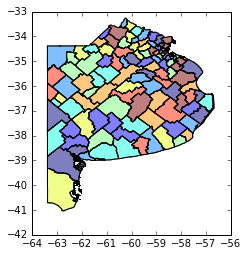

In [81]:
#dibujamos este mapa a modo de ejemplo
departamentos[departamentos['PROVINCIA']=='Buenos_Aires'].plot()

# Muy importante!
 
Las coordenadas en un mapa se dan en (lat, long) que no corresponden a las coordenadas cartesianas sino a (y,x) con lo cual es importante armar los **Point** con (long,lat), sino imposible comprarar quien esta dentro de que..

In [82]:
#es importante el orden long/lat
antenas_gpd =  raw_antennas[['LONGITUD','LATITUD']]
antenas_gpd = [shapely.geometry.Point(x) for x in antenas_gpd.values] 
global antenas_gpd 
antenas_gpd =  gpd.GeoSeries(antenas_gpd)

def point_intersects_geoseries(geo_point,geoseries):
    #entra la geotabla de deptos y un punto y hace un point in Poly p/ el punto contra todos los posibles poligonos
    
    ind = geoseries['geometry'].apply(lambda x: geo_point.intersects(x))
    #el resultante
    dep = geoseries[ind]
    #si no interseca nada
    if dep.shape[0]==0:
        rv0,rv1 = [[None],[None]]
    else:
        rv0 = dep['PROVINCIA'].values 
        rv1 = dep['DEPARTAMENTO'].values 
    
    rv = pd.Series({'PROVINCIA':rv0[0], 'DEPARTAMENTO':rv1[0]})
        
        #pd.Series({'feature1':s+1, 'feature2':s-1})
    return rv

In [83]:
%%time
df = antenas_gpd.apply(lambda point : \
                                                                point_intersects_geoseries(point,departamentos) )

CPU times: user 32 s, sys: 24 ms, total: 32 s
Wall time: 33.3 s


In [84]:
df.head(10)

,DEPARTAMENTO,PROVINCIA
0,None,None
1,La_Costa,Buenos_Aires
2,Ramallo,Buenos_Aires
3,Veinticinco_de_Mayo,Buenos_Aires
4,Veinticinco_de_Mayo,Buenos_Aires
5,Veinticinco_de_Mayo,Buenos_Aires
6,Nueve_de_Julio,Buenos_Aires
7,Nueve_de_Julio,Buenos_Aires
8,Nueve_de_Julio,Buenos_Aires
9,Adolfo_Alsina,Buenos_Aires


In [85]:
raw_antennas.head(10)

,CEL_DESCRIPTION,LATITUD,LONGITUD
CEL_ID,,,
AA001,ANTARTIDA_ARGENTINA,-64.2544,-56.6488
B1061,MUNDO_MARNO,-36.3390,-56.7468
B1062,BUNGE_RAMALLO,-33.4578,-60.0522
BA001,GOBERNADOR_UGARTE,-35.1641,-60.0866
BA003,25_DE_MAYO,-35.4275,-60.1538
BA004,DEL_VALLE,-35.9000,-60.7275
BA006,CARLOS_M_NAON,-35.2355,-60.8283
BA007,ADEMARCHI_(ESTQUIR,-35.2894,-61.3972
BA010,DUDIGNAC,-35.6458,-60.7036


In [86]:
departamentos.head()

,PROVINCIA,DEPARTAMENTO,FILENAME,geometry
0,Buenos_Aires,Adolfo_Alsina,Buenos_Aires-Adolfo_Alsina,POLYGON ((-63.28128433227539 -36.6123085021972...
1,Buenos_Aires,Adolfo_Gonzales_Chaves,Buenos_Aires-Adolfo_Gonzales_Chaves,POLYGON ((-60.45724487304688 -37.6021881103515...
2,Buenos_Aires,Alberti,Buenos_Aires-Alberti,POLYGON ((-60.24544143676758 -34.8256492614746...
3,Buenos_Aires,Almirante_Brown,Buenos_Aires-Almirante_Brown,POLYGON ((-58.33725738525385 -34.7585868835449...
4,Buenos_Aires,Ameghino,Buenos_Aires-Ameghino,"POLYGON ((-62.0881614685058 -34.9758415222168,..."


In [87]:
raw_antennas.shape,df.shape

((5813, 3), (5813, 2))

In [88]:
df.index = raw_antennas.index
test = pd.concat([raw_antennas,df],axis=1)

In [89]:
(test['DEPARTAMENTO'].isnull()).sum()

18

In [90]:
test[test['DEPARTAMENTO'].isnull()]

,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO,PROVINCIA
CEL_ID,,,,,
AA001,ANTARTIDA_ARGENTINA,-64.2544,-56.6488,None,None
BA346,SAN_CLEMENTE_2,-36.3580,-56.7130,None,None
BA997,TEST_SAN_VICENTE,-64.0000,-43.0000,None,None
C2159,ISLA_MARTIN_GARCIA,-34.2634,-58.1953,None,None
CB072,POLO_INGENTIS,-43.3666,-65.0000,None,None
CF257,COTO_MONTE_GRANDE,-58.4805,-34.7735,None,None
CF360,LIBERTAD_POI,-34.4116,-58.4116,None,None
CF365,ESTACION_MARINA,-58.3219,-34.2640,None,None
CF625,ESTACION_PADUA,-34.3952,-58.4220,None,None


## Estamos en el caso
* de las antenas "ficticias" o de prueba (x ejemplo para algun evento especial)
* de antennas que viven en islas o similar
* de "las que se caen al agua"

In [91]:
test[test['DEPARTAMENTO'].isnull()].shape

(18, 5)

In [92]:
# eliminamos a mano las ants de islas etc.
drops = ['AA001', 'BA346','BA997','C2159', 'CF257', 'CF365','TF023']
dropped_antennas += (drops)
#antartida, marambio, TEST antenna, TEST, isla m garcia, ocean point, ocean point , agua
for ant in drops:
    raw_antennas.drop(ant, axis=0,inplace=True) 


In [93]:
dropped_antennas = list(set(dropped_antennas))

len(dropped_antennas)

1582

In [95]:
dropped_file = 'data/celdas_dropped.csv'
dropped_antennas = pd.Series(dropped_antennas)
dropped_antennas.to_csv(dropped_file, index=False)

In [96]:
#los demas puntos los acomodamos

raw_antennas = raw_antennas.set_value("CB072",'LATITUD',-43.3766) #agua
raw_antennas = raw_antennas.set_value("CB072",'LONGITUD',-65.3000) #agua
raw_antennas = raw_antennas.set_value("CF360",'LATITUD',-34.4116) #agua
raw_antennas = raw_antennas.set_value("CF360",'LONGITUD',-58.5116) #agua

raw_antennas = raw_antennas.set_value("CF625",'LATITUD',-34.3952) #agua
raw_antennas = raw_antennas.set_value("CF625",'LONGITUD',-58.6220) #agua

raw_antennas = raw_antennas.set_value("CF653",'LATITUD',-34.4522) #rotado lat long
raw_antennas = raw_antennas.set_value("CF653",'LONGITUD',-58.6206) #rotado lat long

raw_antennas = raw_antennas.set_value("CF686",'LATITUD',-34.8149) #rotado lat long
raw_antennas = raw_antennas.set_value("CF686",'LONGITUD',-58.1534 ) #rotado lat long

raw_antennas = raw_antennas.set_value("CF977",'LATITUD',-34.5619) #agua
raw_antennas = raw_antennas.set_value("CF977",'LONGITUD',-58.468) #agua

raw_antennas = raw_antennas.set_value("CF962",'LATITUD',-34.3620) #agua
raw_antennas = raw_antennas.set_value("CF962",'LONGITUD',-58.7111) #agua
raw_antennas = raw_antennas.set_value("CR078",'LATITUD',-27.4707) #agua
raw_antennas = raw_antennas.set_value("CR078",'LONGITUD',-58.3881) #agua

raw_antennas = raw_antennas.set_value("JU086",'LATITUD',-23.2212) # frontera
raw_antennas = raw_antennas.set_value("JU086",'LONGITUD',-66.8716) # frontera
raw_antennas = raw_antennas.set_value("MI028",'LATITUD',-25.7798) # frontera
raw_antennas = raw_antennas.set_value("MI028",'LONGITUD',-54.5454) # frontera

raw_antennas = raw_antennas.set_value("MI208",'LATITUD',-25.7798) # frontera
raw_antennas = raw_antennas.set_value("MI208",'LONGITUD',-54.5454) # frontera

#raw_antennas = raw_antennas.set_value("",'LONGITUD', ) 
#raw_antennas = raw_antennas.set_value("",'LATITUD', ) 

In [97]:
raw_antennas.loc["CF686"]

CEL_DESCRIPTION      ABRIL
LATITUD           -34.8149
LONGITUD          -58.1534
Name: CF686, dtype: object

## recorremos
el df resultante p/detectar las null Ants

In [98]:
%%time

#es importante el orden long/lat
global antenas_gpd 
antenas_gpd =  raw_antennas[['LONGITUD','LATITUD']]
antenas_gpd = [shapely.geometry.Point(x) for x in antenas_gpd.values] 

antenas_gpd =  gpd.GeoSeries(antenas_gpd)

df = antenas_gpd.apply(lambda point : \
                                                                point_intersects_geoseries(point,departamentos) )

CPU times: user 34 s, sys: 20 ms, total: 34 s
Wall time: 34 s


In [99]:
df.index = raw_antennas.index
test = pd.concat([raw_antennas,df],axis=1)

In [100]:
test[test['DEPARTAMENTO'].isnull()]

,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO,PROVINCIA
CEL_ID,,,,,


In [101]:
#salvo con las antenas filtradas
df.index = raw_antennas.index
antennas = pd.concat([raw_antennas,df],axis=1)

In [102]:
antennas.sample(5)

,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO,PROVINCIA
CEL_ID,,,,,
ST168,JOAQUIN_V_GONZALES,-25.1174,-64.1265,Anta,Salta
CR212,CORRIENTES_10,-27.4808,-58.8167,Capital,Corrientes
TU016,INGIO_SANTA_BARBARA,-27.4594,-65.6152,Rio_Chico,Tucuman
ME092,MAIPU_NORTE,-32.9677,-68.7866,Maipu,Mendoza
CF718,SW-SOUTHERN_WINDS,-34.5949,-58.3800,Distrito_Federal,Ciudad_de_Buenos_Aires


In [103]:
antennas[antennas.isnull().any(axis=1)]

,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO,PROVINCIA
CEL_ID,,,,,


In [104]:
antennas.shape

(5806, 5)

## Ahora vemos cuales son del Gran Chaco

recordar que estas son las que estan en los estados de Jalisco, Oaxaca, Veracruz, Guerrero,Morelos, Yucatan, Queretaro, Chiapas, Puebla, Nayarit, Hidalgo y Tabasco.

In [105]:
granchaco = gpd.GeoDataFrame.from_file(rootdir+'data/ambientes-gc.geojson')

In [106]:
granchaco['Name'] = granchaco['Name'].apply(lambda x :preparar_depto(x))

In [107]:
granchaco.head()

,Name,geometry
0,De_Ypoa,(POLYGON Z ((-57.34032646299994 -26.1691885919...
1,Esteros_del_Ibera,(POLYGON Z ((-58.48979397799991 -28.9349022039...
2,Parque_Chaqueno_Correntino,(POLYGON Z ((-58.89141810099994 -29.52623415 0...
3,Transicion_Chaco_Pantanal,(POLYGON Z ((-58.0025808179999 -19.23088413899...
4,Valle_fluvial_de_los_Rios_Parana_y_Paraguay,(POLYGON Z ((-59.39807189299995 -29.4095258589...


In [108]:
def geom_intersects_granchaco_series(geom,geoseries):
    #entra la geotabla de deptos y un punto y hace un point in Poly p/ el punto contra todos los posibles poligonos
    
    ind = geoseries['geometry'].apply(lambda x: geom.intersects(x))
    #el resultante
    dep = geoseries[ind]
    #si no interseca nada
    if dep.shape[0]==0:
        rv = "NOT_GC"
    else:
        rv = dep['Name'].values[0]
    
    rv = pd.Series({'GC_AREA':rv})
        
        #pd.Series({'feature1':s+1, 'feature2':s-1})
    return rv

In [109]:
%%time

#es importante el orden long/lat
global antenas_gpd 
antenas_gpd =  antennas[['LONGITUD','LATITUD']]
antenas_gpd = [shapely.geometry.Point(x) for x in antenas_gpd.values] 

antenas_gpd =  gpd.GeoSeries(antenas_gpd)

antennas['GC_AREA'] = (antenas_gpd.apply(lambda point : \
                                                        geom_intersects_granchaco_series(point,granchaco) )).values

CPU times: user 8.4 s, sys: 8 ms, total: 8.4 s
Wall time: 8.39 s


In [110]:
antennas.shape

(5806, 6)

In [111]:
# vemos la frecuencia de las antennas en estas areas epidemicas
antennas['GC_AREA'].value_counts()

NOT_GC                                                                  4968
Bosques_arbustales_del_centro_(con_jarilla_Larrea)                       190
Chaco_Serrano_Puntano_Cordobes                                           106
Chaco_de_los_Llanos_y_Valles_Interserranos                                87
Parque_Chaqueno_Correntino                                                74
Transicion_Chaco_Monte                                                    60
Del_Chaco_oriental_del_Bajo_Rio_Paraguay                                  59
Bosque_austral_de_dos_quebrachos                                          50
Chaco_sub_humedo_central                                                  42
Del_Dorsal_Oriental                                                       35
Chaco_de_canadas_y_bosques                                                28
Antiguos_cauces_del_Juramento_Salado                                      16
Interfluvio_del_Bermejo-Pilcomayo                                         16

In [112]:
antennas['EPIDEMIC'] = (~(antennas['GC_AREA'] == "NOT_GC")).astype(int)

antennas.sample(10)

,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO,PROVINCIA,GC_AREA,EPIDEMIC
CEL_ID,,,,,,,
ME231,ZANJON_DE_LOS_C,-32.8613,-68.8548,Capital,Mendoza,NOT_GC,0
SJ064,SAN_JUAN_UMTS_4,-31.5285,-68.5217,Capital,San_Juan,NOT_GC,0
CF001,SANTA_FE,-34.5956,-58.3890,Distrito_Federal,Ciudad_de_Buenos_Aires,NOT_GC,0
BA716,MELCHOR_ROMERO,-34.9936,-58.0346,La_Plata,Buenos_Aires,NOT_GC,0
C1129,HURLINGHAM_3,-34.6041,-58.6370,Moron,Buenos_Aires,NOT_GC,0
ME065,PUNTA_DE_VACAS,-32.8550,-69.7616,Lujan_de_Cuyo,Mendoza,NOT_GC,0
ER007,DIAMANTE,-32.0744,-60.6180,Diamante,Entre_Rios,NOT_GC,0
C1715,AVDA_SAENZ_2,-34.6419,-58.4115,Distrito_Federal,Ciudad_de_Buenos_Aires,NOT_GC,0
TU094,FAMAILLA_2,-27.0630,-65.4029,Famailla,Tucuman,Bosques_arbustales_del_centro_(con_jarilla_Lar...,1


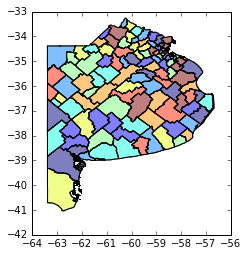

In [113]:
departamentos[departamentos['PROVINCIA']=='Buenos_Aires'].plot()

In [114]:
#chequeo que no haya antenas repetidas
len(np.unique(antennas.index.values))==len(antennas.index.values)

True

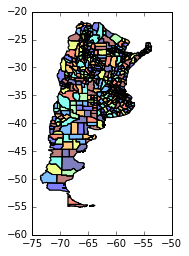

In [554]:
departamentos.plot()

In [115]:
antennas_file_out
antennas.to_csv(antennas_file_out,index=True,sep="|", encoding='utf-8')
!head -n10 $antennas_file_out

CEL_ID|CEL_DESCRIPTION|LATITUD|LONGITUD|DEPARTAMENTO|PROVINCIA|GC_AREA|EPIDEMIC
B1061|MUNDO_MARNO|-36.339|-56.7468|La_Costa|Buenos_Aires|NOT_GC|0
B1062|BUNGE_RAMALLO|-33.4578|-60.0522|Ramallo|Buenos_Aires|NOT_GC|0
BA001|GOBERNADOR_UGARTE|-35.1641|-60.0866|Veinticinco_de_Mayo|Buenos_Aires|NOT_GC|0
BA003|25_DE_MAYO|-35.4275|-60.1538|Veinticinco_de_Mayo|Buenos_Aires|NOT_GC|0
BA004|DEL_VALLE|-35.9|-60.7275|Veinticinco_de_Mayo|Buenos_Aires|NOT_GC|0
BA006|CARLOS_M_NAON|-35.2355|-60.8283|Nueve_de_Julio|Buenos_Aires|NOT_GC|0
BA007|ADEMARCHI_(ESTQUIR|-35.2894|-61.3972|Nueve_de_Julio|Buenos_Aires|NOT_GC|0
BA010|DUDIGNAC|-35.6458|-60.7036|Nueve_de_Julio|Buenos_Aires|NOT_GC|0
BA013|RIVERA|-37.1577|-63.2363|Adolfo_Alsina|Buenos_Aires|NOT_GC|0


In [116]:
#set endemicity per department
a = (departamentos['geometry'].apply(lambda point : \
                                          geom_intersects_granchaco_series(point,granchaco) ).values) 
a = a.flatten()

departamentos['EPIDEMIC'] = (a!= "NOT_GC")


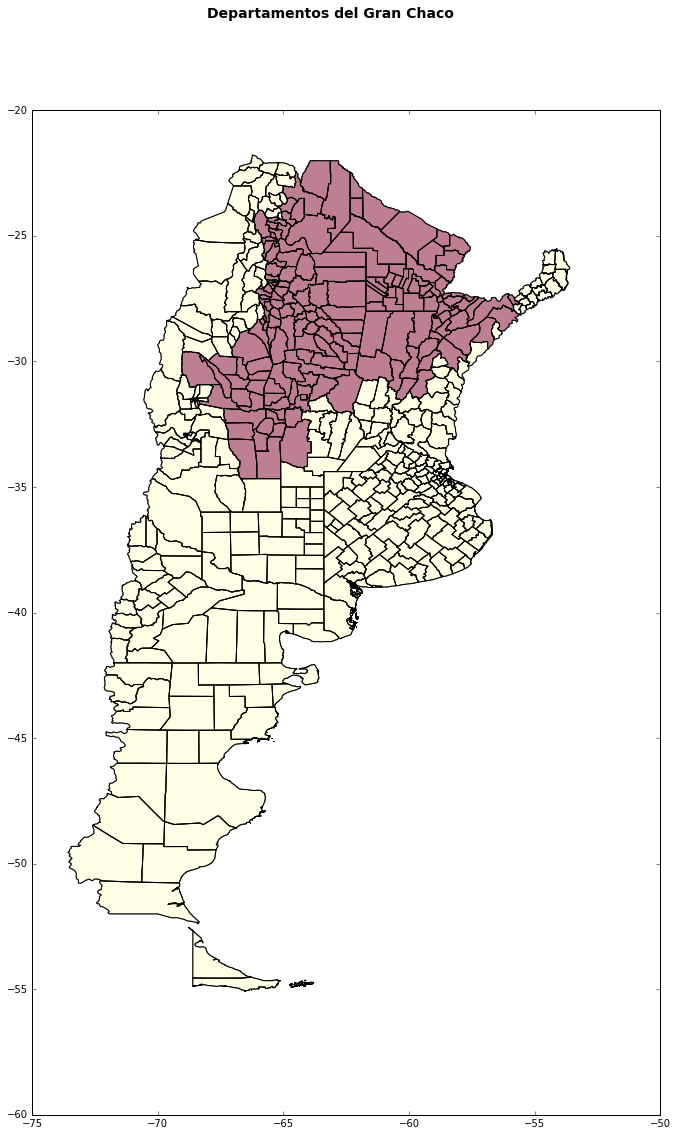

In [557]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(18,18),dpi=300)
fig.suptitle('Departamentos del Gran Chaco', fontsize=14, fontweight='bold')

kw = dict(column="EPIDEMIC",k=6,colormap='YlOrRd')
departamentos.plot(scheme = "Quantiles",**kw)



## Agrego 
lat/long a c/ antenna del file de caro

In [117]:
arg_dir = "../mobility-study/mapa/data/antenna_data.csv"

!head $arg_dir

surr_id|latitude|longitude|subregion|departamento
2057|-32.0161|-61.23||453
2989|-31.2539|-60.7594||447
3347|-28.8316|-59.6502|Del Dorsal Oriental|445
3057|-30.9383|-61.57||441
3762|-31.093|-61.9055||441
4345|-34.602|-58.3752||184
2095|-34.8921|-57.9101||15
1705|-32.692|-63.4349||190
82|-34.4956|-58.498||110


In [118]:
### ADD surrogate antennas latitude/longitude info from caro's processed dataset

# read files

old_antennas = pd.read_csv(arg_dir, sep="|",
                            #engine = 'python',
                           header = 0
                            )

antennas = pd.read_csv(antennas_file_out, sep = "|",
                            #engine = 'python', 
                            )
old_antennas.columns = old_antennas.columns.str.upper()
#old_antennas.drop('EPIDEMIC',axis=1,inplace=True)
old_antennas['SURR_ID'] = old_antennas['SURR_ID'].astype(np.uint32)
#old_antennas['DEPARTAMENTO'] = old_antennas['DEPARTAMENTO'].astype(np.uint32)
old_antennas.rename(columns={'LATITUDE':'LATITUD','LONGITUDE':'LONGITUD'},inplace=True)

In [119]:
antennas.head()

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO,PROVINCIA,GC_AREA,EPIDEMIC
0,B1061,MUNDO_MARNO,-36.3390,-56.7468,La_Costa,Buenos_Aires,NOT_GC,0
1,B1062,BUNGE_RAMALLO,-33.4578,-60.0522,Ramallo,Buenos_Aires,NOT_GC,0
2,BA001,GOBERNADOR_UGARTE,-35.1641,-60.0866,Veinticinco_de_Mayo,Buenos_Aires,NOT_GC,0
3,BA003,25_DE_MAYO,-35.4275,-60.1538,Veinticinco_de_Mayo,Buenos_Aires,NOT_GC,0
4,BA004,DEL_VALLE,-35.9000,-60.7275,Veinticinco_de_Mayo,Buenos_Aires,NOT_GC,0


In [120]:
old_antennas.head()

,SURR_ID,LATITUD,LONGITUD,SUBREGION,DEPARTAMENTO
0,2057,-32.0161,-61.2300,NaN,453.0
1,2989,-31.2539,-60.7594,NaN,447.0
2,3347,-28.8316,-59.6502,Del Dorsal Oriental,445.0
3,3057,-30.9383,-61.5700,NaN,441.0
4,3762,-31.0930,-61.9055,NaN,441.0


In [121]:
# a modo de ejemplo vemos cuantas veces se repiten los pares (long, lat)

a = old_antennas[['LATITUD','LONGITUD']].values
b = np.ascontiguousarray(a).view(np.dtype((np.void, a.dtype.itemsize * a.shape[1])))
unique_a = np.unique(b).view(a.dtype).reshape(-1, a.shape[1])
unique_a.shape, a.shape

((4501, 2), (4520, 2))

In [122]:
a = antennas[['LATITUD','LONGITUD']].values
b = np.ascontiguousarray(a).view(np.dtype((np.void, a.dtype.itemsize * a.shape[1])))
unique_a = np.unique(b).view(a.dtype).reshape(-1, a.shape[1])
unique_a.shape, a.shape

((5691, 2), (5806, 2))

In [123]:
# suponiendo que el lat/long es un buen "id" de c/ antenna, los mergeo sobre estos 2 valores
test =  pd.merge(antennas,old_antennas,on = ['LATITUD','LONGITUD'],how='outer')


In [124]:
test.sample(20)

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO_x,PROVINCIA,GC_AREA,EPIDEMIC,SURR_ID,SUBREGION,DEPARTAMENTO_y
3540,COXXX,VILLA_MARIA_DE_,-29.9054,-63.7208,Rio_Seco,Cordoba,Bosque_austral_de_dos_quebrachos,1.0,3710.0,Bosque austral de dos quebrachos,200.0
3099,CO136,CORRAL_DE_BUSTOS,-33.2844,-62.1986,Marcos_Juarez,Cordoba,NOT_GC,0.0,1066.0,NaN,193.0
5864,NaN,NaN,-31.4168,-64.4380,NaN,NaN,NaN,NaN,368.0,Chaco Serrano Puntano Cordobes,205.0
1345,C1741,SAN_JUSTO_2_NUE,-34.6665,-58.5741,La_Matanza,Buenos_Aires,NOT_GC,0.0,NaN,NaN,NaN
1086,C1484,PARQUE_LAS_HERAS_2,-34.5875,-58.4091,Distrito_Federal,Ciudad_de_Buenos_Aires,NOT_GC,0.0,NaN,NaN,NaN
1204,C1604,HOTEL_PESTANA_(,-34.5970,-58.3810,Distrito_Federal,Ciudad_de_Buenos_Aires,NOT_GC,0.0,NaN,NaN,NaN
3518,CO751,VILLA_DE_SOTO_2,-30.7964,-64.9038,Cruz_del_Eje,Cordoba,Bosques_arbustales_del_centro_(con_jarilla_Lar...,1.0,NaN,NaN,NaN
3637,COW16,SONANDO_POR_BAILAR,-34.6708,-59.0478,General_Rodriguez,Buenos_Aires,NOT_GC,0.0,4390.0,NaN,53.0
527,BA784,CHASCOMUS_3,-35.5666,-57.9935,Chascomus,Buenos_Aires,NOT_GC,0.0,NaN,NaN,NaN
1463,C1933,BQS_DE_PALERMO_2,-34.5742,-58.4202,Distrito_Federal,Ciudad_de_Buenos_Aires,NOT_GC,0.0,NaN,NaN,NaN


In [125]:
test.shape, antennas.shape

((6893, 11), (5806, 8))

In [126]:
# cuantas antennas estan en la base de caro y no en la cruda
test[test['CEL_ID'].isnull()].shape

(1056, 11)

In [128]:
test[test['CEL_ID'].isnull()].sample(50)

,CEL_ID,CEL_DESCRIPTION,LATITUD,LONGITUD,DEPARTAMENTO_x,PROVINCIA,GC_AREA,EPIDEMIC,SURR_ID,SUBREGION,DEPARTAMENTO_y
6296,NaN,NaN,-32.8730,-68.8277,NaN,NaN,NaN,NaN,2574.0,NaN,318.0
6650,NaN,NaN,-27.0828,-61.0978,NaN,NaN,NaN,NaN,3428.0,Chaco sub humedo central,159.0
6082,NaN,NaN,-34.9223,-58.3923,NaN,NaN,NaN,NaN,1478.0,NaN,113.0
6771,NaN,NaN,-40.1916,-62.6125,NaN,NaN,NaN,NaN,3587.0,NaN,87.0
6043,NaN,NaN,-34.7042,-58.3222,NaN,NaN,NaN,NaN,310.0,NaN,7.0
5864,NaN,NaN,-31.4168,-64.4380,NaN,NaN,NaN,NaN,368.0,Chaco Serrano Puntano Cordobes,205.0
6044,NaN,NaN,-34.8014,-58.2383,NaN,NaN,NaN,NaN,4517.0,NaN,14.0
5987,NaN,NaN,-32.8883,-60.7303,NaN,NaN,NaN,NaN,189.0,NaN,450.0
6553,NaN,NaN,-33.9969,-61.6244,NaN,NaN,NaN,NaN,980.0,NaN,444.0
5982,NaN,NaN,-29.1464,-59.6464,NaN,NaN,NaN,NaN,1193.0,Del Dorsal Oriental,445.0


In [129]:
len(test['SURR_ID'].unique()) ,len(old_antennas)

(4521, 4520)

In [130]:
test[test['SURR_ID'].isnull()].shape, test[test['CEL_ID'].isnull()].shape

((2281, 11), (1056, 11))